<a href="https://colab.research.google.com/github/samhithaPeddireddy/Samhitha_Info5502_Spring2022/blob/main/lab_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fifth Lab-assignment (02/24/2022, 50 points in total)

The purpose of this exercise is to understand Data Visualization, we will practice how to create visualizations for different datasets bu using different tools.

Question 1 (15 points). In this questions, you will design a visualization for a small data set and provide a rigorous rationale for your design choices. 

Every 10 years, the census bureau documents the demographic make-up of the United States, influencing everything from congressional districting to social services. This dataset contains a high-level summary of census data for two years a century apart: 1900 and 2000. The data is a CSV (comma-separated values) file that describes the U.S. population in terms of year, reported sex (1: male, 2: female), age group (binned into 5 year segments from 0-4 years old up to 90+ years old), and the total count of people per group. There are 38 data points per year, for a total of 76 data points.

You can download the dataset here: 

Dataset: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab_assignment_05_census.csv

Source: https://www.ipums.org/

(1) Start by choosing a question you'd like a visualization to answer.

(2) Generate a static visualization (i.e., a single image) that you believe effectively answers that question, and use the question as the title of your graphic.

(3) Provide a short write-up (no more than 3 paragraphs) describing your design.


While you must use the data set given, you are free to transform the data as you see fit. Such transforms may include (but are not limited to) log transformation, computing percentages or averages, grouping elements into new categories, or removing unnecessary variables or records. You are also free to incorporate external data as you see fit. Your chart image should be interpretable without recourse to your short write-up. Do not forget to include title, axis labels or legends as needed!

As different visualizations can emphasize different aspects of a data set, you should document what aspects of the data you are attempting to most effectively communicate. In short, what story are you trying to tell? Just as important, also note which aspects of the data might be obscured or down-played due to your visualization design.

In your write-up, you should provide a rigorous rationale for your design decisions. Document the visual encodings you used and why they are appropriate for the data and your specific question. These decisions include the choice of visualization type, size, color, scale, and other visual elements, as well as the use of sorting or other data transformations. How do these decisions facilitate effective communication?

In [ ]:
# Your answer here (question + explanation):

#To find the population of each gender in the year 1900 and 2000





       Sex  Year  Age    People
0     Male  1900    0   4619544
1     Male  2000    0   9735380
2     Male  1900    5   4465783
3     Male  2000    5  10552146
4     Male  1900   10   4057669
..     ...   ...  ...       ...
71  Female  2000   80   3221898
72  Female  1900   85     48614
73  Female  2000   85   1981156
74  Female  1900   90     20093
75  Female  2000   90   1064581

[76 rows x 4 columns]


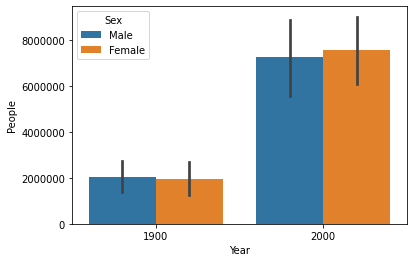

In [ ]:
# Your answer here (python code + explanation):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#have replaced the numerics with Male and female
df=pd.read_csv('/content/lab_assignment_05_census.csv')
df.loc[df["Sex"] == 1, "Sex"] = "Male"
df.loc[df["Sex"] == 2, "Sex"] = "Female"
print(df)
#print(df.columns)
#sns.histplot(df["Age"])
#plt.xlabel("Age")
#plt.ylabel("Count")
#plt.show()

sns.barplot(x = 'Year', y = 'People',hue = 'Sex',data = df)

plt.ticklabel_format(style='plain', axis='y')

plt.show()





In [ ]:
# Your answer here (interpretation of the results):


#In 1900s, the male population is more than female population and in 2000s, 
#female population is more than male population.The overall population is less in 1900s when compared to 2000s
#of the categories,least population is of females in 1900s



Question 2 (20 points). In this question, you are required to use visualizations to tell a story about a dataset.

Step 1. Pick a domain and data set that you are interested in.

Peruse the provided data sets: http://nixdell.com/classes/HCI-and-Design-Spring-2016/Resources.html.

Choose the one of greatest interest to you. If you would like to explore a different data set, you are free to do so but be aware of how much work might be needed to clean the data and get it into a usable format.

Step 2. Explore the data. Find a story. Ask questions.

Start by asking questions. For example: Is there a relationship between melting point and atomic number? Are the brightness and color of stars correlated? Are there different patterns of nucleotides in different regions in human DNA?

Step 3. Assess the fitness of the data for answering your question.

Inspect the data -- it is invariably helpful to first look at the raw values. Does the data seem appropriate for answering your question? If not, you may need to start the process over. If so, does the data need to be reformatted or cleaned prior to analysis? Perform any steps necessary to get the data into shape prior to visual analysis.

Step 4. Create the visualization(s) that tell a story about the data.

You will likely need to create several and see what works best. Keep a record of things you tried and discarded.


unique customers IDs count: 4373
Number of duplicated transactions: 5226


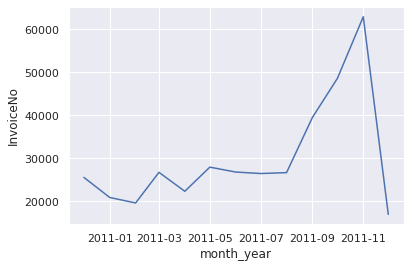

In [51]:
# Your answer here (python code + explanation):
#I have chosen a retail dataset here.
#The questions are-to find unique customer Ids,
#Duplicate transactions,
#To calculate the number of transactions per month,per day and revenue per each month


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
%matplotlib inline

df = pd.read_excel("Online Retail.xlsx")
df.head()
#using len and unique to calculate the unique customer ids count
print("unique customers IDs count:", len(df['CustomerID'].unique().tolist()))
df.describe()

#selecting the data based on unitprice and quantity such that they should be greater than 0
data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]

#dropping duplicate transactions and rows with null values in customerid column
print("Number of duplicated transactions:", len(data[data.duplicated()]))
data.drop_duplicates(inplace = True)
data = data.dropna(subset=['CustomerID'])
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

#adding columns and modifying names of some existing ones
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

data['WeekDay'] = data['InvoiceDate'].dt.day_name()
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))
data['revenue'] = data['UnitPrice'] * data['Quantity']
data['hour'] = data['InvoiceDate'].dt.hour
data.head()
#defining plots based on required condition.
pl = pd.DataFrame(data.groupby(['month_year'])['InvoiceNo'].count()).reset_index()#creating dataframe based on 2 parameters-month_year and invoice no
pl2 = pd.DataFrame(data.groupby(['WeekDay'])['InvoiceNo'].count())
#plot3 = pd.DataFrame(data.groupby(['hour'])['InvoiceNo'].count()).reset_index()
#plot4 = pd.DataFrame(data.groupby(['month_year'])['revenue'].mean()).reset_index()
pl5 = pd.DataFrame(data.groupby(['month_year'])['revenue'].sum()).reset_index()
pl2 = pl2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = pl)
#maximum transactions happened in the month of november










([<matplotlib.patches.Wedge at 0x7f4f7469a410>,
 [Text(0.9580090064469512, 0.5405726071181609, 'Monday'),
  Text(0.01906460371561199, 1.0998347789032528, 'Tuesday'),
  Text(-0.9557867489654478, 0.5444921399818919, 'Wednesday'),
  Text(-0.8688535858905079, -0.6746061416005683, 'Thursday'),
  Text(0.17129699219056743, -1.0865805724687263, 'Friday'),
  Text(0.9702516235106754, -0.5182777123076958, 'Sunday')],
 [Text(0.5225503671528824, 0.294857785700815, '16%'),
  Text(0.010398874753970175, 0.5999098794017742, '17%'),
  Text(-0.521338226708426, 0.2969957127173956, '17%'),
  Text(-0.47392013775845876, -0.3679669863275827, '20%'),
  Text(0.09343472301303676, -0.5926803122556688, '14%'),
  Text(0.5292281582785502, -0.28269693398601586, '16%')])

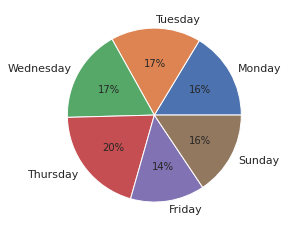

In [48]:
#ax = sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)
plt.pie(pl2['InvoiceNo'],labels=pl2['WeekDay'],autopct='%1.0f%%')
#sales are maximum on thursday and least on friday


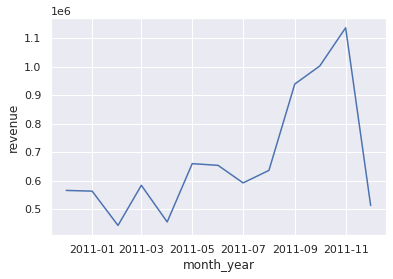

In [49]:

ax = sns.lineplot(x = 'month_year', y='revenue', data = pl5)
#plt.pie(plot5['revenue'],labels=plot5['month_year'])
#revenue is maximum in the month of november


Question 3 (15 points). In this question, you are required to create visualization for time series data. 

We have collected all the articles from AMIA in the last 30 years. The dataset is avaliable on GitHub: https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_amia_cleaned.csv. 

Please use the tool Yake: https://github.com/LIAAD/yake to extract the top N (you can set different N value to get the best visualization results) keywords from the article titles (all the articles), then visualize how the keywords changed over years in one figure. (Split the data by every five years)

In [55]:
# Your python code here:
!pip install yake










     |████████████████████████████████| 60 kB 6.1 MB/s 
     |████████████████████████████████| 132 kB 52.4 MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73967 sha256=85682d50cb96e535493588f7b452fe5d92c5c7f3a7ffd870a09548ebbfbb39ee
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built jellyfish


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from yake import KeywordExtractor 
df=pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab_assignment_05_amia_cleaned.csv")
df.dropna()
df.head(5)
keywext = KeywordExtractor(lan="en", n=1, top=3) 
for j in range(len(df['title'])):
    kw = keywext.extract_keywords(text=df['title'][j])
    for k in kw:
        print(k)

Streaming output truncated to the last 5000 lines.
('ADP', 0.057012387690331526)
('Change', 0.057012387690331526)
('Management', 0.08596317751626563)
('Programs', 0.04776309965539685)
('Computer', 0.06650965107397505)
('Evaluate', 0.06650965107397505)
('Research', 0.08596317751626563)
('Clinical', 0.1447773057422032)
('Laboratory', 0.1447773057422032)
('Systems', 0.0632667216651361)
('Information', 0.09344467948467797)
('Health', 0.09344467948467797)
('Modeling', 0.08596317751626563)
('Care', 0.1447773057422032)
('System', 0.1447773057422032)
('Instrumentation', 0.08596317751626563)
('Processing', 0.08596317751626563)
('Physiologic', 0.1447773057422032)
('Realtime', 0.030396371632413578)
('On-line', 0.04491197687864554)
('Patient', 0.08596317751626563)
('Areas', 0.057012387690331526)
('Small', 0.08596317751626563)
('Computer', 0.08596317751626563)
('Care', 0.08596317751626563)
('System', 0.1447773057422032)
('Patient', 0.1447773057422032)
('Signals', 0.08596317751626563)
('Analysis', 0

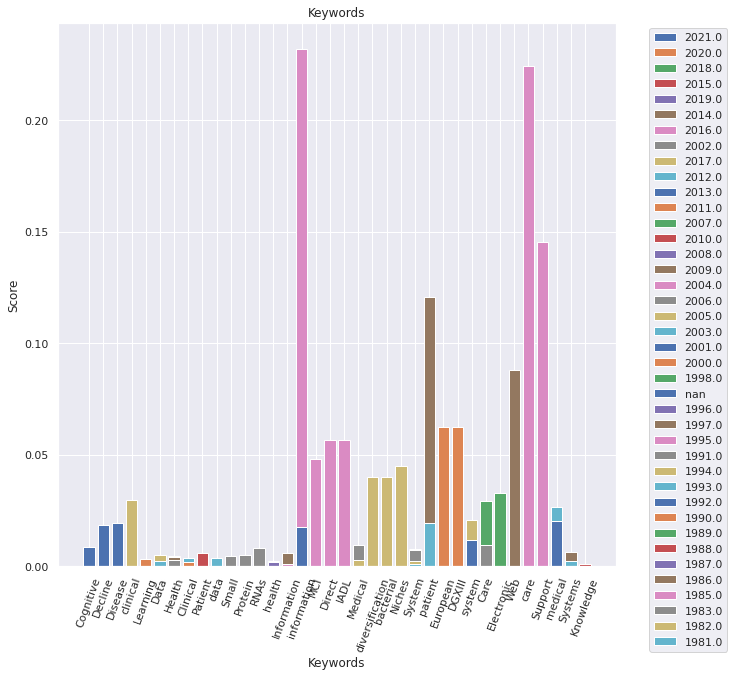

In [74]:
plt.figure(figsize=(10, 10))
for yr in df.year.unique():
    text = " ".join(title for title in df[df['year']==yr]['title'].values)
    kw_extractor = KeywordExtractor(lan='en', n=1,top=3)
    kw = kw_extractor.extract_keywords(text)
    Score = [y for x, y in kw]
    Keywords=[x for x, y in kw]
   #plt.bar(yr,Score,label=Keywords)
    plt.bar(Keywords,Score,label=yr)
   
plt.title("Keywords")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(rotation=70)
plt.xlabel("Keywords")
plt.ylabel("Score")
plt.show()